# Credit Default  Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

### Reading CSV dataset file

In [2]:
data=pd.read_csv(r"C:\Users\sarvesh shirsat\Desktop\ML project\credit_default.csv")
data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [3]:
data.shape

(252000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
data.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

## Data Cleaning

In [6]:
data=data.drop(["Id"],axis=1)
#Id is unique value column so dropping it

In [7]:
data.isnull().sum()

income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

There is no missing value 

### Dtype Conversion

#### Categorical ro Numerical (Using LabelEncoder)

In [8]:
data.dtypes

income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

In [9]:
data.married=le.fit_transform(data.married)
data.house_ownership=le.fit_transform(data.house_ownership)
data.car_ownership=le.fit_transform(data.car_ownership)
data.profession=le.fit_transform(data.profession)
data.city=le.fit_transform(data.city)
data.state=le.fit_transform(data.state)

In [10]:
data.dtypes

income                 int64
age                    int64
experience             int64
married                int32
house_ownership        int32
car_ownership          int32
profession             int32
city                   int32
state                  int32
current_job_years      int64
current_house_years    int64
risk_flag              int64
dtype: object

### Target Column risk_flag

In [11]:
data.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [12]:
100*data.risk_flag.value_counts()/len(data.risk_flag)

0    87.7
1    12.3
Name: risk_flag, dtype: float64

<AxesSubplot:xlabel='risk_flag', ylabel='count'>

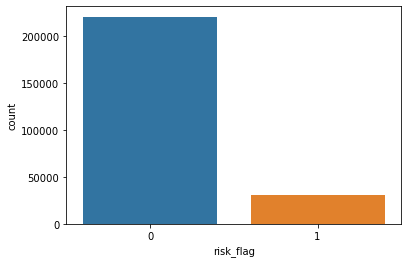

In [13]:
sns.countplot(data['risk_flag'])

from above countplot target value are inbalance

## Data Visualisation

#### Correlation Plot  

In [14]:
d=data.corr().round(2)
d

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
income,1.00,-0.00,0.01,0.00,0.02,0.00,0.00,-0.00,-0.00,0.01,-0.00,-0.00
age,-0.00,1.00,-0.00,-0.01,-0.01,0.01,-0.01,0.00,-0.00,0.00,-0.02,-0.02
experience,0.01,-0.00,1.00,-0.00,-0.01,0.01,0.00,-0.03,-0.00,0.65,0.02,-0.03
married,0.00,-0.01,-0.00,1.00,-0.02,0.00,-0.01,0.01,-0.01,0.00,-0.01,0.02
house_ownership,0.02,-0.01,-0.01,-0.02,1.00,-0.00,0.00,-0.01,-0.01,-0.01,-0.01,0.02
car_ownership,0.00,0.01,0.01,0.00,-0.00,1.00,0.01,0.00,0.03,0.01,0.00,-0.02
profession,0.00,-0.01,0.00,-0.01,0.00,0.01,1.00,0.02,0.00,-0.00,0.00,-0.00
city,-0.00,0.00,-0.03,0.01,-0.01,0.00,0.02,1.00,-0.04,-0.03,-0.01,0.00
state,-0.00,-0.00,-0.00,-0.01,-0.01,0.03,0.00,-0.04,1.00,0.01,0.01,-0.00
current_job_years,0.01,0.00,0.65,0.00,-0.01,0.01,-0.00,-0.03,0.01,1.00,0.01,-0.02


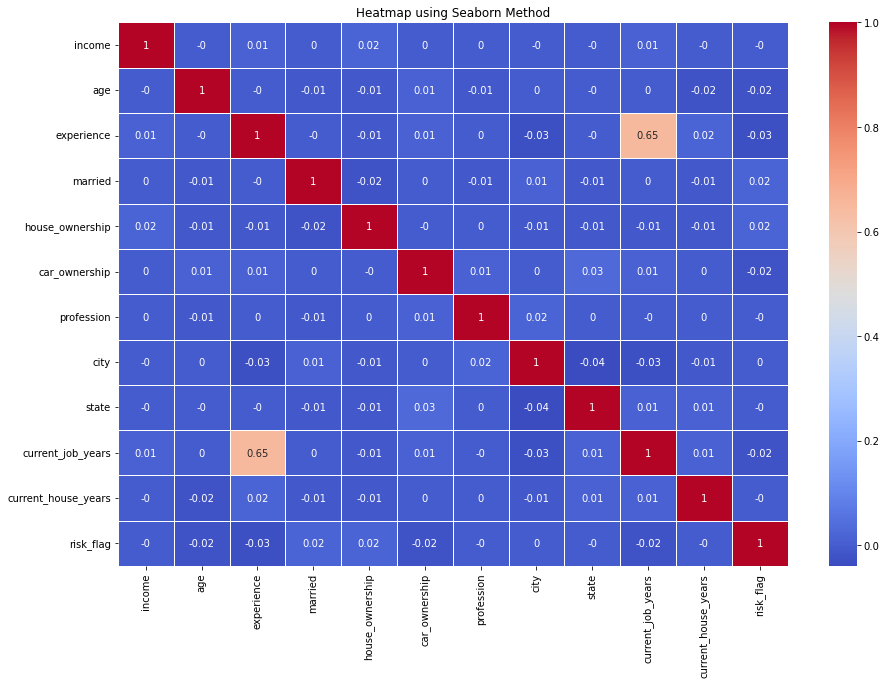

In [15]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(d,linewidth=1,annot=True,cmap="coolwarm")
plt.title("Heatmap using Seaborn Method")
plt.show()

## Base Model Building

### Data Splitting 

In [16]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [17]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: risk_flag, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state = 100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((176400, 11), (75600, 11), (176400,), (75600,))

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [21]:
lm.fit(x_train,y_train)

LogisticRegression()

In [22]:
lm=lm.predict(x_test)
lm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from  sklearn.metrics import confusion_matrix

In [24]:
c = confusion_matrix(lm,y_test)
c

array([[66296,  9304],
       [    0,     0]], dtype=int64)

In [25]:
acc=c.diagonal().sum()/c.sum()*100
acc

87.6931216931217

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(lm,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     75600
           1       0.00      0.00      0.00         0

    accuracy                           0.88     75600
   macro avg       0.50      0.44      0.47     75600
weighted avg       1.00      0.88      0.93     75600



## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [29]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
pre1 = dt.predict(x_test)
pre1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
c1 = confusion_matrix(pre1,y_test)
c1

array([[61479,  4043],
       [ 4817,  5261]], dtype=int64)

In [32]:
acc1 = c1.diagonal().sum()/c1.sum()*100
acc1

88.28042328042328

In [33]:
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     65522
           1       0.57      0.52      0.54     10078

    accuracy                           0.88     75600
   macro avg       0.75      0.73      0.74     75600
weighted avg       0.88      0.88      0.88     75600



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
pre2 = rf.predict(x_test)
pre2

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [37]:
c2 = confusion_matrix(pre2,y_test)
c2

array([[63098,  4335],
       [ 3198,  4969]], dtype=int64)

In [38]:
acc2 = c2.diagonal().sum()/c2.sum()*100
acc2

90.03571428571429

In [39]:
print(classification_report(pre2,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     67433
           1       0.53      0.61      0.57      8167

    accuracy                           0.90     75600
   macro avg       0.74      0.77      0.76     75600
weighted avg       0.91      0.90      0.90     75600



## Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ab=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [41]:
ab.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [42]:
ab_pred=ab.predict(x_test)
ab_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
c3=confusion_matrix(ab_pred,y_test)
c3

array([[61461,  4023],
       [ 4835,  5281]], dtype=int64)

In [44]:
acc_ab=c3.diagonal().sum()/c3.sum()*100
acc_ab

88.28306878306879

In [45]:
print(classification_report(ab_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     65484
           1       0.57      0.52      0.54     10116

    accuracy                           0.88     75600
   macro avg       0.75      0.73      0.74     75600
weighted avg       0.88      0.88      0.88     75600



## XG-Boost

In [46]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [47]:
xg.fit(x_train,y_train)

[13:28:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
xg_pred=xg.predict(x_test)
xg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
c4=confusion_matrix(xg_pred,y_test)
c4

array([[65306,  7416],
       [  990,  1888]], dtype=int64)

In [50]:
acc_xg=c4.diagonal().sum()/c4.sum()*100
acc_xg

88.88095238095238

In [51]:
print(classification_report(xg_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     72722
           1       0.20      0.66      0.31      2878

    accuracy                           0.89     75600
   macro avg       0.59      0.78      0.62     75600
weighted avg       0.96      0.89      0.92     75600



##  KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=25)

In [53]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [54]:
kp=kn.predict(x_test)
kp

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
c5=confusion_matrix(kp,y_test)
c5

array([[62748,  4607],
       [ 3548,  4697]], dtype=int64)

In [56]:
acck=c5.diagonal().sum()/c5.sum()*100
acck

89.21296296296296

In [57]:
print(classification_report(kp,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     67355
           1       0.50      0.57      0.54      8245

    accuracy                           0.89     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.90      0.89      0.89     75600



##  Support Vector Machine

In [58]:
# from sklearn.svm import SVC
# svc=SVC()

In [59]:
# svc.fit(x_train,y_train)

In [60]:
# svm_pred=svc.predict(x_test)
# svm_pred

In [61]:
# m7=confusion_matrix(svm_pred,y_test)
# m7

In [62]:
# acc_svc=m7.diagonal().sum()/m7.sum()*100
# acc_svc

In [63]:
# print(classification_report(svm_pred,y_test))

##  Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
nb=MultinomialNB()

In [66]:
nb.fit(x_train,y_train)

MultinomialNB()

In [67]:
nb_pred=nb.predict(x_test)

In [68]:
c6=confusion_matrix(nb_pred,y_test)
c6

array([[65261,  9106],
       [ 1035,   198]], dtype=int64)

In [69]:
acc_nb=c6.diagonal().sum()/c6.sum()*100
acc_nb

86.58597883597884

In [70]:
print(classification_report(nb_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     74367
           1       0.02      0.16      0.04      1233

    accuracy                           0.87     75600
   macro avg       0.50      0.52      0.48     75600
weighted avg       0.97      0.87      0.91     75600



# Class Imbalance Technique

## SMOTE(Synthetic Minority Oversampling Techniques)

In [71]:
data.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [73]:
x1=data.iloc[:,0:-1]
y1=data.iloc[:,-1]

In [74]:
x_s,y_s=sm.fit_resample(x1,y1)

In [75]:
x_s.shape,y_s.shape

((442008, 11), (442008,))

In [76]:
y_s.value_counts()

0    221004
1    221004
Name: risk_flag, dtype: int64

<AxesSubplot:xlabel='risk_flag', ylabel='count'>

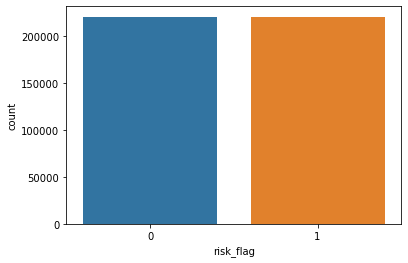

In [77]:
sns.countplot(y_s)

## Outlier Treatment

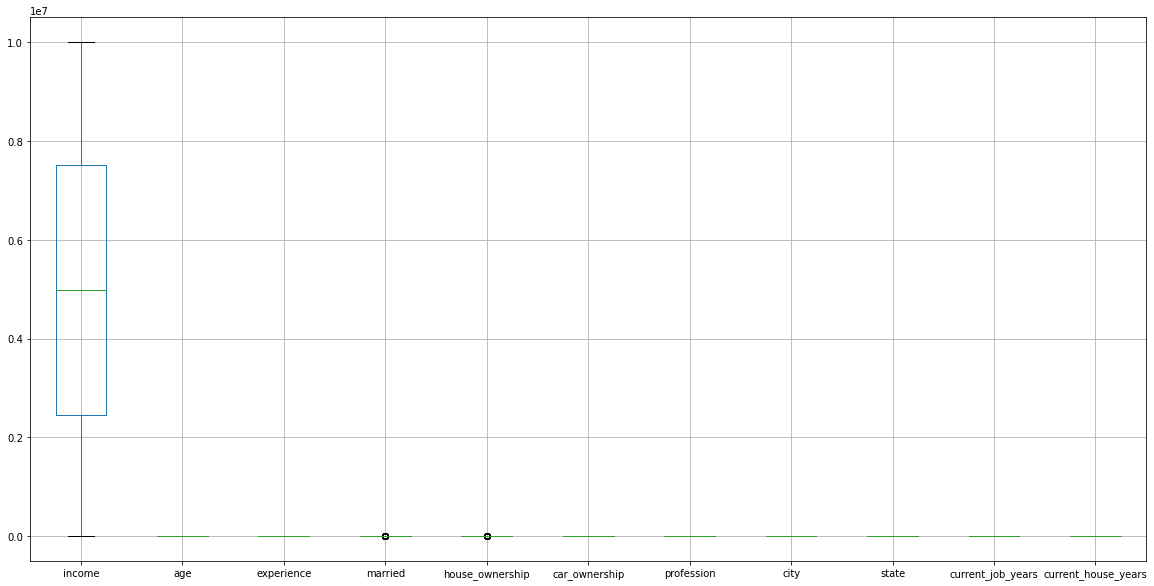

In [78]:
x_s.boxplot(figsize=(20,10))
plt.show()

need not to do outlier tretment

##  Skewness Treatment

In [79]:
x_s.skew()

income                 0.000853
age                    0.017681
experience             0.027835
married               -2.591448
house_ownership       -3.840946
car_ownership          1.047722
profession            -0.033921
city                   0.009601
state                  0.020813
current_job_years      0.292281
current_house_years    0.046561
dtype: float64

In [80]:
y_s.skew()

0.0

no need to treat skewness 

# Data splitting

In [81]:
x_tr,x_te,y_tr,y_te=train_test_split(x_s,y_s,test_size=0.2,random_state=100)
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((353606, 11), (88402, 11), (353606,), (88402,))

##  Logistic Regression

In [83]:
lm=LogisticRegression()
lm.fit(x_tr,y_tr)

LogisticRegression()

In [84]:
p1=lm.predict(x_te)
p1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
cm1=confusion_matrix(p1,y_te)
cm1

array([[44187, 44215],
       [    0,     0]], dtype=int64)

In [86]:
ac1=cm1.diagonal().sum()/cm1.sum()*100
ac1

49.98416325422502

In [87]:
print(classification_report(p1,y_te))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67     88402
           1       0.00      0.00      0.00         0

    accuracy                           0.50     88402
   macro avg       0.50      0.25      0.33     88402
weighted avg       1.00      0.50      0.67     88402



## Decision Tree

In [88]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [89]:
p2=dt.predict(x_te)
p2

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [90]:
cm2=confusion_matrix(p2,y_te)
cm2

array([[38069,  2291],
       [ 6118, 41924]], dtype=int64)

In [91]:
ac2=cm2.diagonal().sum()/cm2.sum()*100
ac2

90.48777176986947

In [92]:
print(classification_report(p2,y_te))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     40360
           1       0.95      0.87      0.91     48042

    accuracy                           0.90     88402
   macro avg       0.90      0.91      0.90     88402
weighted avg       0.91      0.90      0.91     88402



##  Random Forest

In [93]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [94]:
p3=rf.predict(x_te)
p3

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [95]:
cm3=confusion_matrix(p3,y_te)
cm3

array([[38761,  1299],
       [ 5426, 42916]], dtype=int64)

In [96]:
ac3=cm3.diagonal().sum()/cm3.sum()*100
ac3

92.39270604737449

In [97]:
print(classification_report(p3,y_te))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     40060
           1       0.97      0.89      0.93     48342

    accuracy                           0.92     88402
   macro avg       0.92      0.93      0.92     88402
weighted avg       0.93      0.92      0.92     88402



### AUCROC Curve for Random Forest Model 

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [99]:
pred=rf.predict_proba(x_te)

In [100]:
roc=roc_auc_score(p3,y_te)
df1=pd.DataFrame(pred)

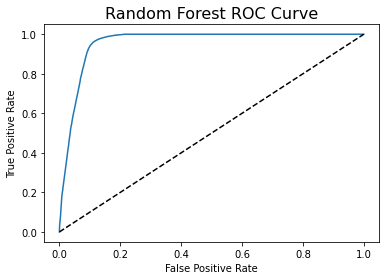

In [101]:
fpr,tpr,threshold=roc_curve(y_te,df1.iloc[:,1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

##  Adaboost

In [102]:
ab.fit(x_tr,y_tr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [103]:
p4=dt.predict(x_te)
p4

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [104]:
cm4=confusion_matrix(p4,y_te)
cm4

array([[38069,  2291],
       [ 6118, 41924]], dtype=int64)

In [105]:
ac4=cm4.diagonal().sum()/cm4.sum()*100
ac4

90.48777176986947

In [106]:
print(classification_report(p4,y_te))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     40360
           1       0.95      0.87      0.91     48042

    accuracy                           0.90     88402
   macro avg       0.90      0.91      0.90     88402
weighted avg       0.91      0.90      0.91     88402



## XG Boost

In [107]:
xg.fit(x_tr,y_tr)

[13:30:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
p5=xg.predict(x_te)
p5

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [109]:
cm5=confusion_matrix(p5,y_te)
cm5

array([[37730,  3778],
       [ 6457, 40437]], dtype=int64)

In [110]:
ac5=cm5.diagonal().sum()/cm5.sum()*100
ac5

88.42220764236103

In [111]:
print(classification_report(p5,y_te))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     41508
           1       0.91      0.86      0.89     46894

    accuracy                           0.88     88402
   macro avg       0.88      0.89      0.88     88402
weighted avg       0.89      0.88      0.88     88402



## KNN

In [112]:
kn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=25)

In [113]:
p6=kn.predict(x_te)
p6

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [114]:
cm6=confusion_matrix(p6,y_te)
cm6

array([[38608,  5258],
       [ 5579, 38957]], dtype=int64)

In [115]:
ac6=cm6.diagonal().sum()/cm6.sum()*100
ac6

87.74122757403678

In [116]:
print(classification_report(p6,y_te))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     43866
           1       0.88      0.87      0.88     44536

    accuracy                           0.88     88402
   macro avg       0.88      0.88      0.88     88402
weighted avg       0.88      0.88      0.88     88402



## Naive Bayes

In [117]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [118]:
p7=nb.predict(x_te)
p7

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [119]:
cm7=confusion_matrix(p7,y_te)
cm7

array([[23039, 21807],
       [21148, 22408]], dtype=int64)

In [120]:
ac7=cm7.diagonal().sum()/cm7.sum()*100
ac7

51.40947037397344

In [121]:
print(classification_report(p7,y_te))

              precision    recall  f1-score   support

           0       0.52      0.51      0.52     44846
           1       0.51      0.51      0.51     43556

    accuracy                           0.51     88402
   macro avg       0.51      0.51      0.51     88402
weighted avg       0.51      0.51      0.51     88402



# CONCLUSION

### Here I got 92% accuracy with Random Forest after class inbalance technique with good precision, recall and f1-score.


### Hence Random forest is the best fitted Model for this dataset.